# This decompose the data onto UMAP components
- plot time courses of the components
- compute spectral analysis

In [1]:
import pandas as pd
import umap
import numpy as np

/home/vlastimilo/PROJECTS/Hybernska/2.5Ga/libusin20250322/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the dataframe

In [2]:
dataPath = './data/'
df = pd.read_csv(dataPath + 'filtered_data3.csv')

# Check the dataframe

In [5]:
# List all variables (columns) in the DataFrame
mask = 'BIO'
df


,Age,BIO_ExtinctionIntensity (%),BIO_OriginationIntensity(%),BIO_Difference_Cubic,SEA_Modern land sea level (C = 176.6 106km2/km),TEM_GAT,TEM_dT,CO2_pCO2 (ppm),O2_Mid O2%,O2_Range_Normalized,...,SR_Range_Normalized,LIP_LIP_PDF,MAG_INT_mean,MAG_INT_std,MAG_POL_FREQUENCY,MAG_POL_FREQUENCY.3,ZIR_Count_PDF_d18O,ZIR_Interpolated_mean_d18O,ZIR_Count_PDF_Hf,ZIR_Interpolated_mean_Hf
0,252.00,1.000000,0.000000,0.506887,0.263456,0.805210,0.032628,1.000000,1.000000,0.930485,...,0.969434,0.600,0.008044,0.000039,0.090909,0.1000,0.017316,0.437092,0.752941,0.285054
1,251.95,1.000000,0.000000,0.506988,0.263456,0.805657,0.032042,1.000000,0.998872,0.931869,...,0.934624,0.610,0.008299,0.000033,0.095455,0.1020,0.017316,0.437092,0.694118,0.307148
2,251.90,1.000000,0.000000,0.507089,0.263456,0.806103,0.031457,1.000000,0.997744,0.933254,...,0.899814,0.620,0.008553,0.000026,0.100000,0.1040,0.017316,0.437092,0.694118,0.307148
3,251.85,1.000000,0.000000,0.507190,0.263456,0.806549,0.030872,1.000000,0.996615,0.934638,...,0.868058,0.630,0.008828,0.000025,0.104545,0.1060,0.017316,0.437092,0.694118,0.307148
4,251.80,1.000000,0.000000,0.507291,0.263456,0.806995,0.030287,1.000000,0.995487,0.936023,...,0.836303,0.640,0.009102,0.000025,0.109091,0.1080,0.017316,0.437092,0.694118,0.307148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,0.20,0.002184,0.141072,0.912523,0.012354,0.022142,0.963248,0.058102,0.003722,0.152117,...,0.040715,0.016,0.586923,0.117646,0.154545,0.3720,0.333333,0.621146,0.082353,0.634783
5037,0.15,0.002184,0.141072,0.910671,0.012417,0.023525,0.960951,0.058095,0.002792,0.151117,...,0.044493,0.012,0.531968,0.073930,0.150000,0.3715,0.350649,0.610494,0.082353,0.634783
5038,0.10,0.002184,0.141072,0.908819,0.012480,0.024909,0.958654,0.058088,0.001861,0.150116,...,0.048271,0.008,0.477013,0.030214,0.145455,0.3710,0.372294,0.593541,0.082353,0.634783
5039,0.05,0.002184,0.141072,0.906966,0.012543,0.026293,0.956357,0.058081,0.000931,0.149115,...,0.040902,0.004,0.377562,0.030358,0.140909,0.3705,0.372294,0.593541,0.082353,0.634783


# Run the UMAP embedding

In [15]:
import umap
import pandas as pd

# Filter columns that contain the string in the 'mask' variable
filtered_data = df.loc[:, df.columns.str.contains(mask, case=False)]  # case=False makes it case-insensitive
filtered_data = df.dropna()
# Drop non-numeric columns if necessary
numeric_data = filtered_data.select_dtypes(include=['number'])

# Apply UMAP to embed the data into 2D space
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(numeric_data, n_neighbors=1000, min_dist=1)

# Convert the embedding to a DataFrame for easier handling
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2','UMAP_3'])

# Display or save the embedding
print(embedding_df)

/home/vlastimilo/PROJECTS/Hybernska/2.5Ga/libusin20250322/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vlastimilo/PROJECTS/Hybernska/2.5Ga/libusin20250322/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


        UMAP_1     UMAP_2    UMAP_3
0    -1.702227   5.160609  7.786261
1    -1.704409   5.159131  7.786401
2    -1.712860   5.152161  7.783968
3    -1.711641   5.153125  7.784163
4    -1.715232   5.149046  7.778965
...        ...        ...       ...
5035  9.744732  14.085409 -5.404979
5036  9.742432  14.085208 -5.407876
5037  9.742393  14.084352 -5.407675
5038  9.741436  14.084073 -5.408895
5039  9.737995  14.084263 -5.413188

[5040 rows x 3 columns]


# Plot the embedding

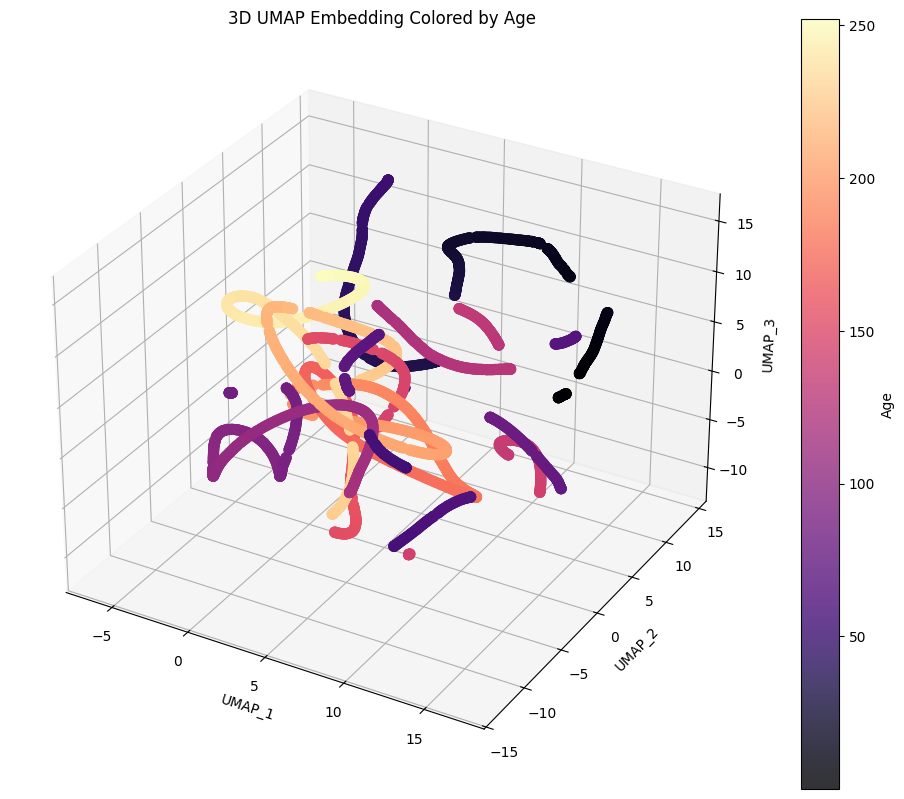

In [16]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Add the 'Age' column to the embedding DataFrame for coloring
# Check the dimensionality of the embedding
if embedding.shape[1] == 2:
    # Add the 'Age' column to the embedding DataFrame for coloring
    embedding_df['Age'] = df['Age'].reset_index(drop=True)  # Ensure alignment of indices

    # Plot the embedding in 2D
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        embedding_df['UMAP_1'], 
        embedding_df['UMAP_2'], 
        c=embedding_df['Age'], 
        cmap='magma', 
        s=50, 
        alpha=0.8
    )
    plt.title('2D UMAP Embedding Colored by Age')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.colorbar(scatter, label='Age')
    plt.show()

elif embedding.shape[1] == 3:
    # Add the 'Age' column to the embedding DataFrame for coloring
    embedding_df['Age'] = df['Age'].reset_index(drop=True)  # Ensure alignment of indices

    # Plot the embedding in 3D
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        embedding_df['UMAP_1'], 
        embedding_df['UMAP_2'], 
        embedding_df['UMAP_3'], 
        c=embedding_df['Age'], 
        cmap='magma', 
        s=50, 
        alpha=0.8
    )
    ax.set_title('3D UMAP Embedding Colored by Age')
    ax.set_xlabel('UMAP_1')
    ax.set_ylabel('UMAP_2')
    ax.set_zlabel('UMAP_3')
    fig.colorbar(scatter, ax=ax, label='Age')
    plt.show()
else:
    print("Unsupported dimensionality for plotting.")



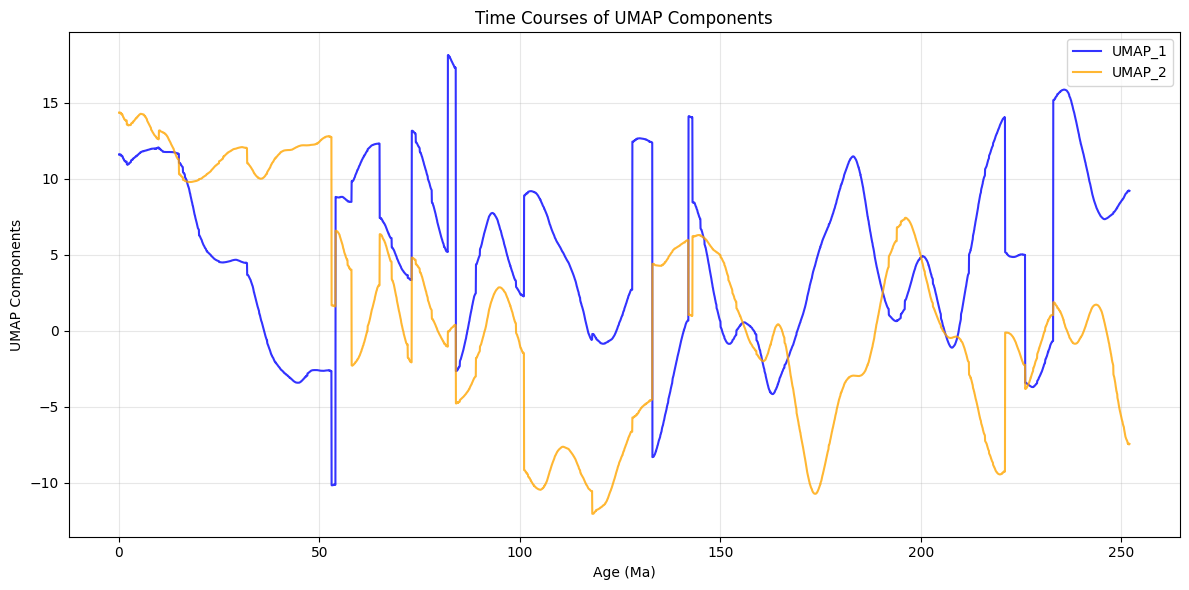

In [8]:
# Plot the time courses of UMAP components
plt.figure(figsize=(12, 6))

# Plot UMAP_1
plt.plot(embedding_df['Age'], embedding_df['UMAP_1'], label='UMAP_1', color='blue', alpha=0.8)

# Plot UMAP_2
plt.plot(embedding_df['Age'], embedding_df['UMAP_2'], label='UMAP_2', color='orange', alpha=0.8)

# Add labels, legend, and title
plt.xlabel('Age (Ma)')
plt.ylabel('UMAP Components')
plt.title('Time Courses of UMAP Components')
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Spectral analysis (Welch)

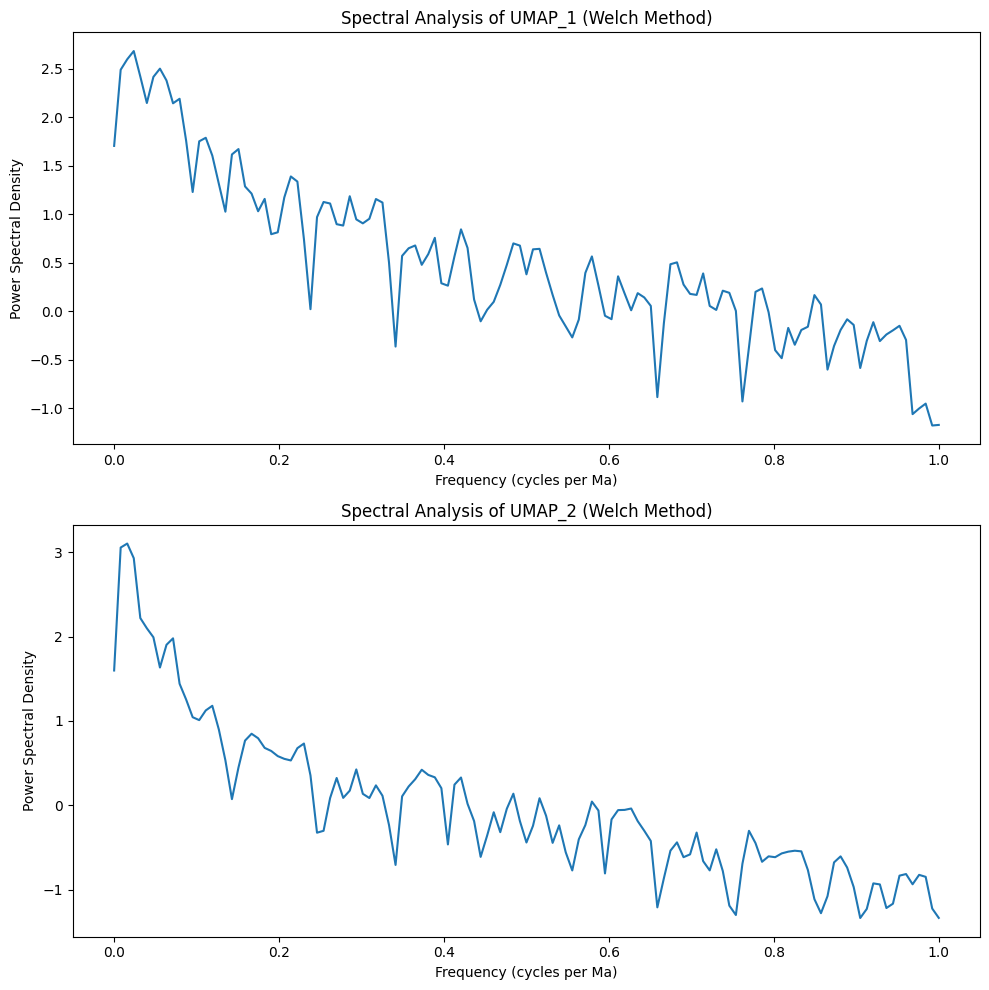

In [9]:
from scipy.signal import welch

max_frequency = 1  # Maximum frequency to display in cycles per Ma
num_epochs = 2  # Number of epochs for the Welch method

# Demean UMAP_1 and UMAP_2
umap_1_demeaned = embedding_df['UMAP_1'] - embedding_df['UMAP_1'].mean()
umap_2_demeaned = embedding_df['UMAP_2'] - embedding_df['UMAP_2'].mean()

# Sampling frequency in Hz (1 / sampling interval in Ma)
sampling_frequency = 1 / 0.05  # Sampling frequency in cycles per Ma

# Apply Welch method to estimate the power spectral density
frequencies_umap_1, psd_umap_1 = welch(
    umap_1_demeaned, fs=sampling_frequency, nperseg=len(umap_1_demeaned) // num_epochs
)
frequencies_umap_2, psd_umap_2 = welch(
    umap_2_demeaned, fs=sampling_frequency, nperseg=len(umap_2_demeaned) // num_epochs
)

# Filter frequencies to show only up to the maximum frequency
mask_umap_1 = frequencies_umap_1 <= max_frequency
mask_umap_2 = frequencies_umap_2 <= max_frequency

# Plot spectral analysis results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Spectral analysis for UMAP_1
axs[0].plot(frequencies_umap_1[mask_umap_1], np.log10(psd_umap_1[mask_umap_1]))  # Filtered frequencies and PSD
axs[0].set_title('Spectral Analysis of UMAP_1 (Welch Method)')
axs[0].set_xlabel('Frequency (cycles per Ma)')
axs[0].set_ylabel('Power Spectral Density')

# Spectral analysis for UMAP_2
axs[1].plot(frequencies_umap_2[mask_umap_2], np.log10(psd_umap_2[mask_umap_2]))  # Filtered frequencies and PSD
axs[1].set_title('Spectral Analysis of UMAP_2 (Welch Method)')
axs[1].set_xlabel('Frequency (cycles per Ma)')
axs[1].set_ylabel('Power Spectral Density')

plt.tight_layout()
plt.show()